<a href="https://colab.research.google.com/github/Harsh18999/Zeotap_Data_Science_Assignment/blob/main/Harsh_Kumar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# create dataframes of provided files
custm_df = pd.read_csv('https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE&export=download') # datafame of customers.csv
prod_df = pd.read_csv('https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0&export=download')  # datafame of products.csv
trans_df = pd.read_csv('https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF&export=download')  # datafame of transactions.csv

In [3]:
custm_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
trans_df = trans_df.merge(prod_df.drop(columns='Price'), on='ProductID', how='left')

In [7]:
num_trans_df = trans_df.groupby(['CustomerID'])['TransactionID'].count().reset_index()
num_trans_df.columns = ['CustomerID', 'Num_Transactions']

df = pd.merge(custm_df, num_trans_df, on='CustomerID', how='left')
df.head()

,CustomerID,CustomerName,Region,SignupDate,Num_Transactions
0,C0001,Lawrence Carroll,South America,2022-07-10,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4.0
2,C0003,Michael Rivera,South America,2024-03-07,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8.0
4,C0005,Laura Weber,Asia,2022-08-15,3.0


In [8]:
avg_order_val = trans_df.groupby(['CustomerID'])['TotalValue'].mean().reset_index()
avg_order_val.columns = ['CustomerID', 'Avg_Order_Value']

df = pd.merge(df, avg_order_val, on='CustomerID', how='left')
df.head()

,CustomerID,CustomerName,Region,SignupDate,Num_Transactions,Avg_Order_Value
0,C0001,Lawrence Carroll,South America,2022-07-10,5.0,670.904
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4.0,465.685
2,C0003,Michael Rivera,South America,2024-03-07,4.0,681.345
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8.0,669.360
4,C0005,Laura Weber,Asia,2022-08-15,3.0,678.080


In [9]:
product_cat_count = trans_df.groupby(['CustomerID', 'Category'])['Quantity'].sum().reset_index()

for cat in ['Electronics', 'Books', 'Home Decor', 'Clothing']:
  cat_df = product_cat_count[product_cat_count['Category'] == cat][['CustomerID', 'Quantity']]
  cat_df.columns = ['CustomerID', f'Num_Purch_{cat}']
  df = pd.merge(df, cat_df, on='CustomerID', how='left')
  df[ f'Num_Purch_{cat}'] = df[ f'Num_Purch_{cat}'].fillna(0)

df.head()

,CustomerID,CustomerName,Region,SignupDate,Num_Transactions,Avg_Order_Value,Num_Purch_Electronics,Num_Purch_Books,Num_Purch_Home Decor,Num_Purch_Clothing
0,C0001,Lawrence Carroll,South America,2022-07-10,5.0,670.904,7.0,2.0,3.0,0.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4.0,465.685,0.0,0.0,6.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,4.0,681.345,4.0,0.0,6.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8.0,669.360,6.0,8.0,9.0,0.0
4,C0005,Laura Weber,Asia,2022-08-15,3.0,678.080,4.0,0.0,3.0,0.0


In [10]:
df.drop(columns=['SignupDate',  'CustomerName'], inplace=True)

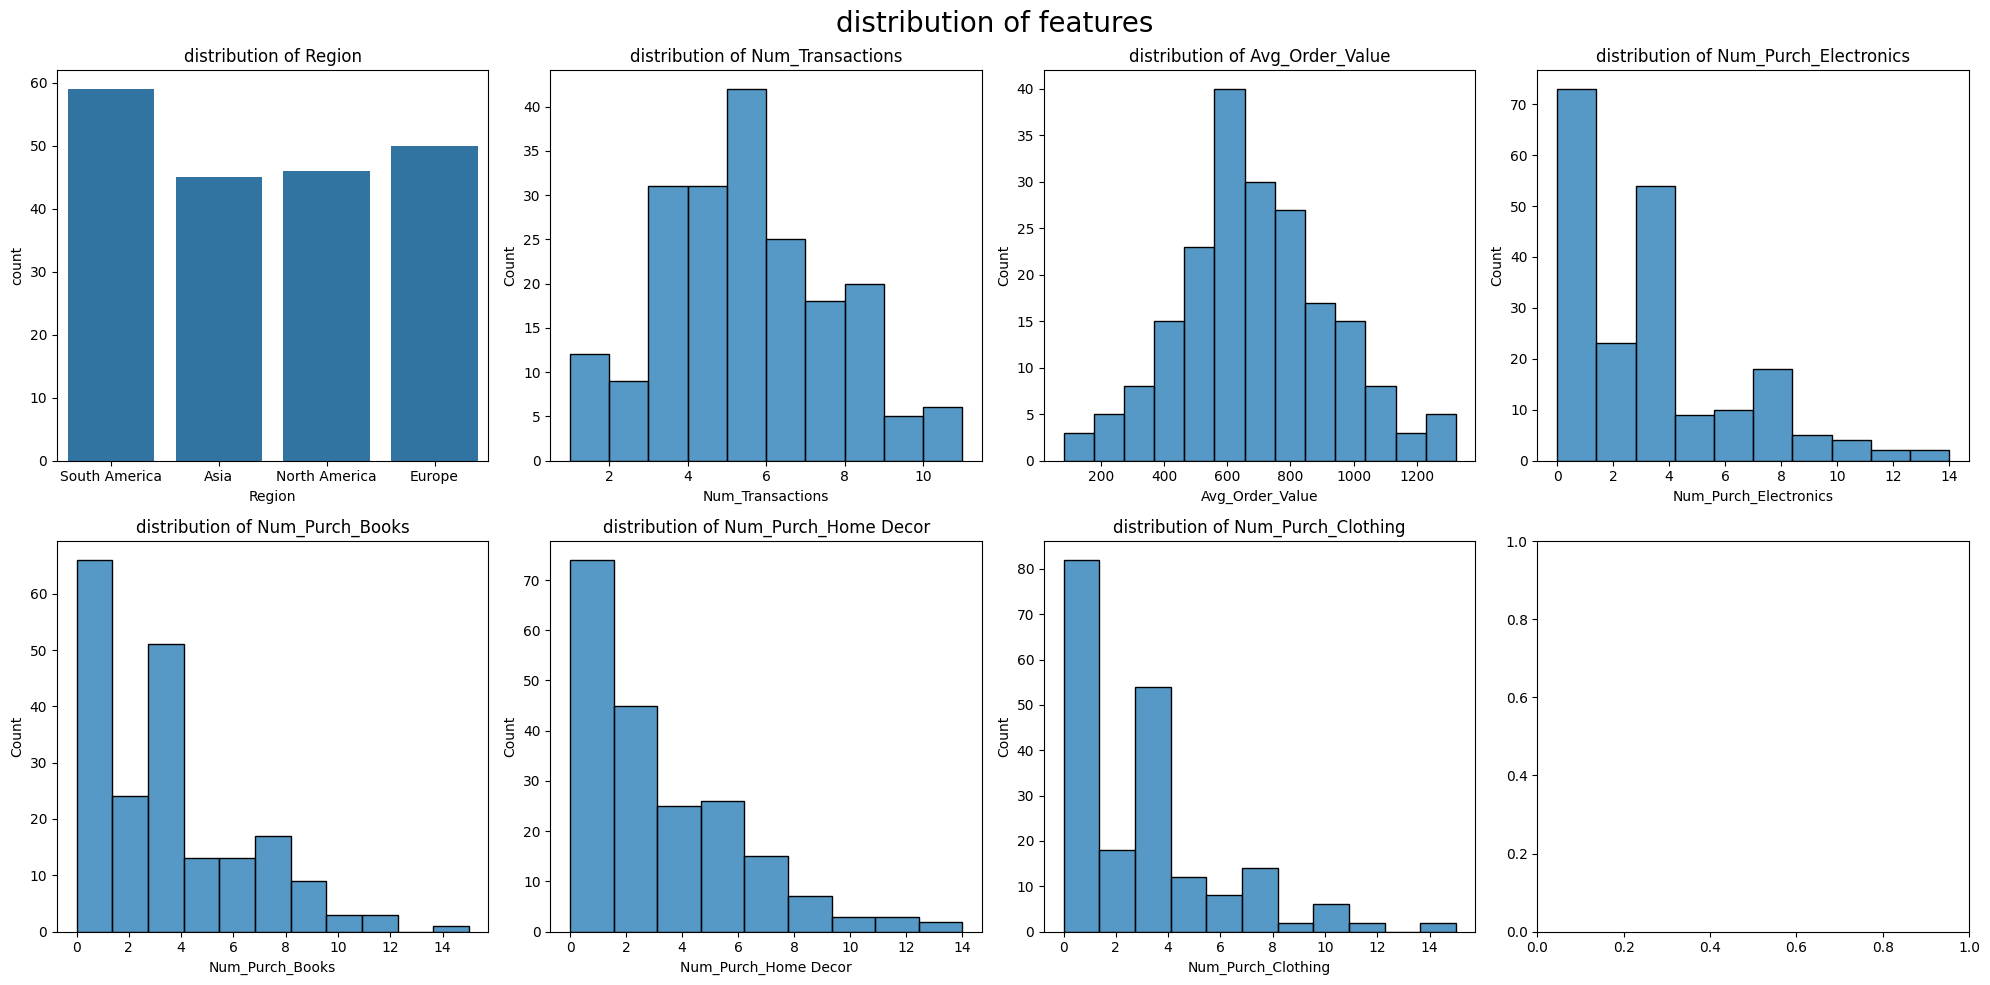

In [11]:
plt.subplots(2, 4 , figsize=(20, 10))
plt.suptitle('distribution of features', fontsize=20)

for i, col in enumerate(df.columns[1:]):
  plt.subplot(2, 4, i+1)
  if df[col].dtype == 'object':
    sns.countplot(x=col, data=df)
  else:
    sns.histplot(x=col, data=df)
  plt.title(f'distribution of {col}')

plt.tight_layout()
plt.show()

In [12]:
df.fillna(0, inplace=True)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

pre_process = ColumnTransformer(
    transformers=[
        ('Standard Scaler', StandardScaler(), ['Num_Transactions', 'Avg_Order_Value', 'Num_Purch_Electronics', 'Num_Purch_Books', 'Num_Purch_Home Decor']),
        ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'), ['Region'])
    ], remainder='passthrough'
)

processed_data = pre_process.fit_transform(df.drop(columns=['CustomerID']))

In [41]:
processed_data[:10]

array([[ 0.        , -0.05478053,  1.26084031, -0.45872492, -0.06378214,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.45129368, -0.9039848 , -1.02269971, -1.11171413,  0.91748152,
         1.        ,  0.        ,  0.        ,  0.        ,  4.        ],
       [-0.45129368, -0.01157526,  0.2821803 , -1.11171413,  0.91748152,
         0.        ,  0.        ,  0.        ,  1.        ,  4.        ],
       [ 1.35388105, -0.06116966,  0.93462031,  1.50024271,  1.89874518,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.90258736, -0.02508596,  0.2821803 , -1.11171413, -0.06378214,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.45129368,  1.54245503, -1.02269971,  0.5207589 , -0.06378214,
         0.        ,  0.        ,  0.        ,  1.        ,  4.        ],
       [-0.90258736,  0.72745786,  0.2821803 , -1.11171413,  0.26330575,
         1.        ,  0.        ,  0.        

In [43]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=5)
model.fit(processed_data)

labels = model.labels_

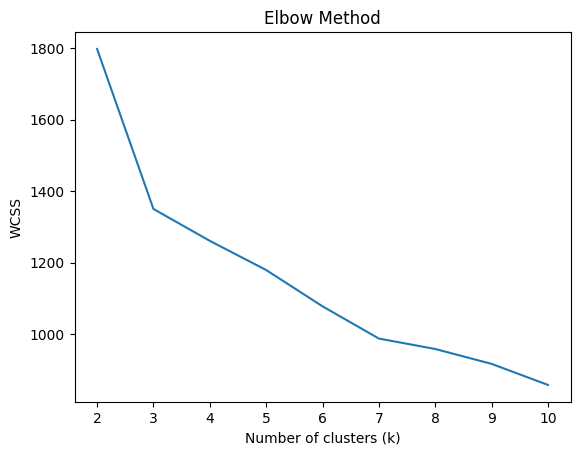

In [44]:
wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

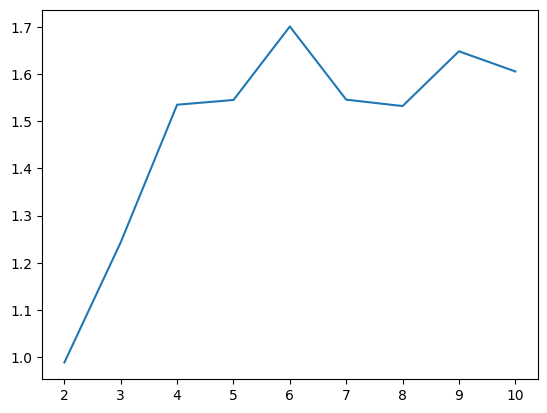

In [45]:
from sklearn.metrics import davies_bouldin_score

db_score = []
for i in range(2, 11):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(processed_data)
  labels = model.labels_
  db_score.append(davies_bouldin_score(processed_data, labels))

plt.plot(range(2, 11), db_score)

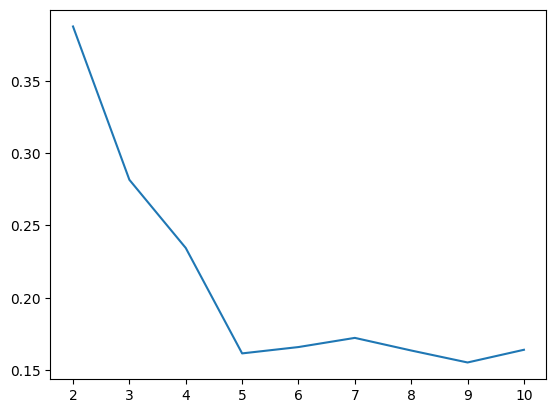

In [47]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(processed_data)
  labels = model.labels_
  silhouette_scores.append(silhouette_score(processed_data, labels))

plt.plot(range(2, 11), silhouette_scores)

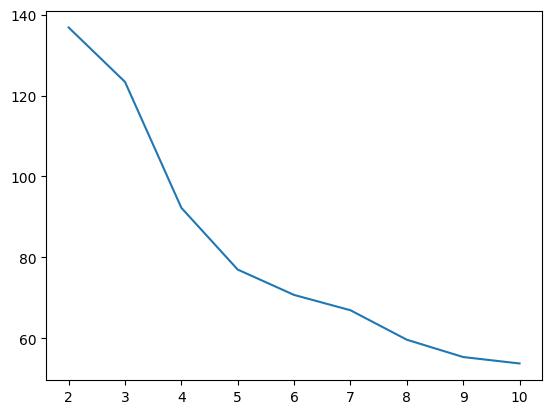

In [48]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for i in range(2, 11):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(processed_data)
  labels = model.labels_
  ch_scores.append(calinski_harabasz_score(processed_data, labels))

plt.plot(range(2, 11), ch_scores)

In [53]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)
model.fit(processed_data)

labels = model.labels_

print(davies_bouldin_score(processed_data, labels))
print(silhouette_score(processed_data, labels))
print(calinski_harabasz_score(processed_data, labels))

0.9889103746314597
0.38750645628590746
136.82663553960782
